# Image Classification
In this project, you'll classify images from the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).  The dataset consists of airplanes, dogs, cats, and other objects. You'll preprocess the images, then train a convolutional neural network on all the samples. The images need to be normalized and the labels need to be one-hot encoded.  You'll get to apply what you learned and build a convolutional, max pooling, dropout, and fully connected layers.  At the end, you'll get to see your neural network's predictions on the sample images.
## Get the Data
Run the following cell to download the [CIFAR-10 dataset for python](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz).


# 图像分类

在该项目中，你将会对来自 [CIFAR-10 数据集](https://www.cs.toronto.edu/~kriz/cifar.html) 中的图像进行分类。数据集中图片的内容包括飞机（airplane）、狗（dogs）、猫（cats）及其他物体。你需要处理这些图像，接着对所有的样本训练一个卷积神经网络。

具体而言，在项目中你要对图像进行正规化处理（normalization)，同时还要对图像的标签进行 one-hot 编码。接着你将会应用到你所学的技能来搭建一个具有卷积层、最大池化（Max Pooling）层、Dropout  层及全连接（fully connected）层的神经网络。最后，你会训练你的神经网络，会得到你神经网络在样本图像上的预测结果。

## 下载数据

运行如下代码下载 [CIFAR-10 dataset for python](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz)。

In [1]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm
import problem_unittests as tests
import tarfile

cifar10_dataset_folder_path = 'cifar-10-batches-py'

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

if not isfile('cifar-10-python.tar.gz'):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='CIFAR-10 Dataset') as pbar:
        urlretrieve(
            'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz',
            'cifar-10-python.tar.gz',
            pbar.hook)

if not isdir(cifar10_dataset_folder_path):
    with tarfile.open('cifar-10-python.tar.gz') as tar:
        tar.extractall()
        tar.close()


tests.test_folder_path(cifar10_dataset_folder_path)

All files found!


## Explore the Data
The dataset is broken into batches to prevent your machine from running out of memory.  The CIFAR-10 dataset consists of 5 batches, named `data_batch_1`, `data_batch_2`, etc.. Each batch contains the labels and images that are one of the following:
* airplane
* automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck

Understanding a dataset is part of making predictions on the data.  Play around with the code cell below by changing the `batch_id` and `sample_id`. The `batch_id` is the id for a batch (1-5). The `sample_id` is the id for a image and label pair in the batch.

Ask yourself "What are all possible labels?", "What is the range of values for the image data?", "Are the labels in order or random?".  Answers to questions like these will help you preprocess the data and end up with better predictions.

## 探索数据集


为防止在运行过程中内存不足的问题，该数据集已经事先被分成了5批（batch），名为`data_batch_1`、`data_batch_2`等。每一批中都含有 *图像* 及对应的 *标签*，都是如下类别中的一种：

* 飞机
* 汽车
* 鸟
* 鹿
* 狗
* 青蛙
* 马
* 船
* 卡车

理解数据集也是对数据进行预测的一部分。修改如下代码中的 `batch_id` 和 `sample_id`，看看输出的图像是什么样子。其中，`batch_id` 代表着批次数（1-5），`sample_id` 代表着在该批内图像及标签的编号。

你可以尝试回答如下问题：
* 可能出现的 *标签* 都包括哪些？
* 图像数据的取值范围是多少？
* *标签* 的排列顺序是随机的还是有序的？

对这些问题的回答，会有助于更好地处理数据，并能更好地进行预测。


Stats of batch 1:
Samples: 10000
Label Counts: {0: 1005, 1: 974, 2: 1032, 3: 1016, 4: 999, 5: 937, 6: 1030, 7: 1001, 8: 1025, 9: 981}
First 20 Labels: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6]

Example of Image 5:
Image - Min Value: 0 Max Value: 252
Image - Shape: (32, 32, 3)
Label - Label Id: 1 Name: automobile


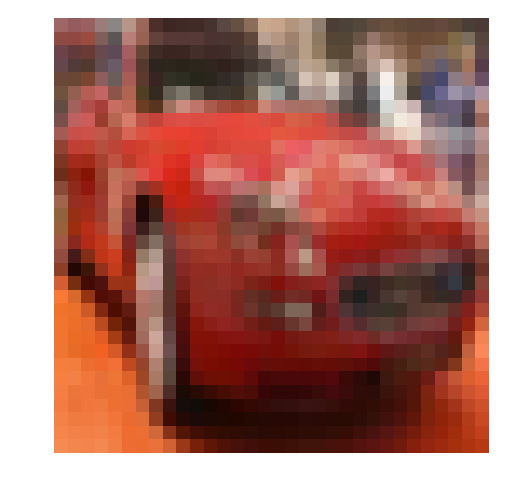

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper
import numpy as np

# Explore the dataset
# batch_id, sample_id = 5
helper.display_stats(cifar10_dataset_folder_path, 1, 5)

**回答：**
- 可能出现的 标签 都包括 1,2,3,4,5,6,7,8,9
- 图像数据的取值范围是 0~255
- 标签 的排列顺序是随机的


## Implement Preprocess Functions
### Normalize
In the cell below, implement the `normalize` function to take in image data, `x`, and return it as a normalized Numpy array. The values should be in the range of 0 to 1, inclusive.  The return object should be the same shape as `x`.

## 图像预处理功能的实现
### 正规化

在如下的代码中，修改 `normalize` 函数，使之能够对输入的图像数据 `x` 进行处理，输出一个经过正规化的、Numpy array 格式的图像数据。

**注意：**
处理后的值应当在 $[0,1]$ 的范围之内。返回值应当和输入值具有相同的形状。

In [3]:
def normalize(x):
    """
    Normalize a list of sample image data in the range of 0 to 1
    : x: List of image data.  The image shape is (32, 32, 3)
    : return: Numpy array of normalize data
    """
    # TODO: Implement Function
    X_normalized = (x.astype(float))/255.
    return X_normalized


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_normalize(normalize)

Tests Passed


### One-hot encode
Just like the previous code cell, you'll be implementing a function for preprocessing.  This time, you'll implement the `one_hot_encode` function. The input, `x`, are a list of labels.  Implement the function to return the list of labels as One-Hot encoded Numpy array.  The possible values for labels are 0 to 9. The one-hot encoding function should return the same encoding for each value between each call to `one_hot_encode`.  Make sure to save the map of encodings outside the function.

**Hint:**

Look into LabelBinarizer in the preprocessing module of sklearn.

### One-hot 编码

在如下代码中，你将继续实现预处理的功能，实现一个 `one_hot_encode` 函数。函数的输入 `x` 是 *标签* 构成的列表，返回值是经过 One_hot 处理过后的这列 *标签* 对应的 One_hot 编码，以 Numpy array 储存。其中，*标签* 的取值范围从0到9。每次调用该函数时，对相同的标签值，它输出的编码也是相同的。请确保在函数外保存编码的映射（map of encodings）。

**提示：**

你可以尝试使用 sklearn preprocessing 模块中的 `LabelBinarizer` 函数。

In [4]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

def one_hot_encode(x):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """
    # TODO: Implement Function
    y = np.zeros((len(x), 10))
    for i in range(len(x)):
        y[i,x[i]] = 1
    return y


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_one_hot_encode(one_hot_encode)

Tests Passed


### Randomize Data
As you saw from exploring the data above, the order of the samples are randomized.  It doesn't hurt to randomize it again, but you don't need to for this dataset.

### 随机打乱数据

正如你在上方探索数据部分所看到的，样本的顺序已经被随机打乱了。尽管再随机处理一次也没问题，不过对于该数据我们没必要再进行一次相关操作了。

## Preprocess all the data and save it
Running the code cell below will preprocess all the CIFAR-10 data and save it to file. The code below also uses 10% of the training data for validation.

## 对所有图像数据进行预处理并保存结果

运行如下代码，它将会预处理所有的 CIFAR-10 数据并将它另存为文件。此外，如下的代码还将会把 10% 的训练数据留出作为验证数据。

In [5]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# Preprocess Training, Validation, and Testing Data
helper.preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode)

# Check Point
This is your first checkpoint.  If you ever decide to come back to this notebook or have to restart the notebook, you can start from here.  The preprocessed data has been saved to disk.

# 检查点

这是你的首个检查点。因为预处理完的数据已经被保存到硬盘上了，所以如果你需要回顾或重启该 notebook，你可以在这里重新开始。

In [6]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import pickle
import problem_unittests as tests
import helper

# Load the Preprocessed Validation data
valid_features, valid_labels = pickle.load(open('preprocess_validation.p', mode='rb'))

## Build the network
For the neural network, you'll build each layer into a function.  Most of the code you've seen has been outside of functions. To test your code more thoroughly, we require that you put each layer in a function.  This allows us to give you better feedback and test for simple mistakes using our unittests before you submit your project.

>**Note:** If you're finding it hard to dedicate enough time for this course each week, we've provided a small shortcut to this part of the project. In the next couple of problems, you'll have the option to use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages to build each layer, except the layers you build in the "Convolutional and Max Pooling Layer" section.  TF Layers is similar to Keras's and TFLearn's abstraction to layers, so it's easy to pickup.

>However, if you would like to get the most out of this course, try to solve all the problems _without_ using anything from the TF Layers packages. You **can** still use classes from other packages that happen to have the same name as ones you find in TF Layers! For example, instead of using the TF Layers version of the `conv2d` class, [tf.layers.conv2d](https://www.tensorflow.org/api_docs/python/tf/layers/conv2d), you would want to use the TF Neural Network version of `conv2d`, [tf.nn.conv2d](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d). 

Let's begin!

### Input
The neural network needs to read the image data, one-hot encoded labels, and dropout keep probability. Implement the following functions
* Implement `neural_net_image_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `image_shape` with batch size set to `None`.
 * Name the TensorFlow placeholder "x" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_label_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `n_classes` with batch size set to `None`.
 * Name the TensorFlow placeholder "y" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_keep_prob_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) for dropout keep probability.
 * Name the TensorFlow placeholder "keep_prob" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).

These names will be used at the end of the project to load your saved model.

Note: `None` for shapes in TensorFlow allow for a dynamic size.

## 搭建神经网络

为搭建神经网络，你需要将搭建每一层的过程封装到一个函数中。大部分的代码你在函数外已经见过。为能够更透彻地测试你的代码，我们要求你把每一层都封装到一个函数中。这能够帮助我们给予你更好的回复，同时还能让我们使用 unittests 在你提交报告前检测出你项目中的小问题。

>**注意：** 如果你时间紧迫，那么在该部分我们为你提供了一个便捷方法。在接下来的一些问题中，你可以使用来自 [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) 或 [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) 包中的函数来搭建各层，不过不可以用他们搭建卷积-最大池化层。TF Layers 和 Keras 及 TFLean 中对层的抽象比较相似，所以你应该很容易上手。

>


However, if you would like to get the most out of this course, try to solve all the problems _without_ using anything from the TF Layers packages. You **can** still use classes from other packages that happen to have the same name as ones you find in TF Layers! For example, instead of using the TF Layers version of the `conv2d` class, [tf.layers.conv2d](https://www.tensorflow.org/api_docs/python/tf/layers/conv2d), you would want to use the TF Neural Network version of `conv2d`, [tf.nn.conv2d](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d). 

不过，如果你希望能够更多地实践，我们希望你能够在**不**使用 TF Layers 的情况下解决所有问题。你依然**能**使用来自其他包但和 layers 中重名的函数。例如，你可以使用 TF Neural Network 版本的 `conv_2d

让我们开始吧！

### 输入

神经网络需要能够读取图像数据、经 one-hot 编码之后的标签及 dropout 中的保留概率。修改如下函数：

* 修改 `neural_net_image_input` 函数：
 * 返回 [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)。
 * 使用 `image_shape` 设定形状，设定批大小（batch size)为 `None`。
 * 使用 [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) 中的 `Name` 参数，命名该 TensorFlow placeholder 为 "x"。
* 修改 `neural_net_label_input` 函数： 
 * 返回 [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)。
 * 使用 `n_classes` 设定形状，设定批大小（batch size)为 `None`。
 * 使用 [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) 中的 `Name` 参数，命名该 TensorFlow placeholder 为 "y"。
* 修改 `neural_net_keep_prob_input` 函数：
 * 返回 [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) 作为 dropout 的保留概率（keep probability）。
 * 使用 [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) 中的 `Name` 参数，命名该 TensorFlow placeholder 为 "keep_prob"。
 
我们会在项目最后使用这些名字，来载入你储存的模型。

**注意：**在 TensorFlow 中，对形状设定为 `None`，能帮助设定一个动态的大小。

In [7]:
import tensorflow as tf

def neural_net_image_input(image_shape):
    """
    Return a Tensor for a batch of image input
    : image_shape: Shape of the images
    : return: Tensor for image input.
    """
    # TODO: Implement Function
    x = tf.placeholder(tf.float32, (None, image_shape[0], image_shape[1], image_shape[2]), "x")
    return x 


def neural_net_label_input(n_classes):
    """
    Return a Tensor for a batch of label input
    : n_classes: Number of classes
    : return: Tensor for label input.
    """
    # TODO: Implement Function
    y = tf.placeholder(tf.int32, (None, n_classes), "y")
    return y


def neural_net_keep_prob_input():
    """
    Return a Tensor for keep probability
    : return: Tensor for keep probability.
    """
    # TODO: Implement Function
    return tf.placeholder(tf.float32, None, "keep_prob")


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tf.reset_default_graph()
tests.test_nn_image_inputs(neural_net_image_input)
tests.test_nn_label_inputs(neural_net_label_input)
tests.test_nn_keep_prob_inputs(neural_net_keep_prob_input)

Image Input Tests Passed.
Label Input Tests Passed.
Keep Prob Tests Passed.


### Convolution and Max Pooling Layer
Convolution layers have a lot of success with images. For this code cell, you should implement the function `conv2d_maxpool` to apply convolution then max pooling:
* Create the weight and bias using `conv_ksize`, `conv_num_outputs` and the shape of `x_tensor`.
* Apply a convolution to `x_tensor` using weight and `conv_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.
* Add bias
* Add a nonlinear activation to the convolution.
* Apply Max Pooling using `pool_ksize` and `pool_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.

**Note:** You **can't** use [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) for **this** layer, but you can still use TensorFlow's [Neural Network](https://www.tensorflow.org/api_docs/python/tf/nn) package. You may still use the shortcut option for all the **other** layers.

** Hint: **

When unpacking values as an argument in Python, look into the [unpacking](https://docs.python.org/3/tutorial/controlflow.html#unpacking-argument-lists) operator. 

### 卷积-最大池（Convolution and Max Pooling）化层

卷积层在图像处理中取得了不小的成功。在这部分的代码中，你需要修改 `conv2d_maxpool` 函数来先后实现卷积及最大池化的功能。

* 使用 `conv_ksize`、`conv_num_outputs` 及 `x_tensor` 来创建权重（weight）及偏差（bias）变量。
* 对 `x_tensor` 进行卷积，使用 `conv_strides` 及*权重*。
 * 我们建议使用 SAME padding，不过你也可尝试其他 padding 模式。 
* 加上*偏差*。
* 对卷积结果加上一个非线性函数作为激活层。
* 基于 `pool_kszie` 及 `pool_strides` 进行最大池化。
 * 我们建议使用 SAME padding，不过你也可尝试其他 padding 模式。
 
**注意：**
你**不**可以使用来自 [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) 或 [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) 包中的函数来实现**这一层**的功能。但是你可以使用 TensorFlow 的[Neural Network](https://www.tensorflow.org/api_docs/python/tf/nn)包。

对于如上的快捷方法，你在**其他层**中可以尝试使用。


**提示：**
当你在 Python 中希望展开（unpacking）某个变量的值作为函数的参数，你可以参考 [unpacking](https://docs.python.org/3/tutorial/controlflow.html#unpacking-argument-lists) 运算符。

In [19]:
def conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides):
    """
    Apply convolution then max pooling to x_tensor
    :param x_tensor: TensorFlow Tensor
    :param conv_num_outputs: Number of outputs for the convolutional layer
    :param conv_ksize: kernal size 2-D Tuple for the convolutional layer
    :param conv_strides: Stride 2-D Tuple for convolution
    :param pool_ksize: kernal size 2-D Tuple for pool
    :param pool_strides: Stride 2-D Tuple for pool
    : return: A tensor that represents convolution and max pooling of x_tensor
    """ 
    # TODO: Implement Function
    conv_num_inputs = x_tensor.get_shape().as_list()[-1]
    shape = (conv_ksize[0], conv_ksize[1], conv_num_inputs, conv_num_outputs)
    conv_W = tf.Variable(tf.truncated_normal(shape=shape, mean=0.0, stddev=0.1))
    conv_b = tf.Variable(tf.zeros(conv_num_outputs))
    layer = tf.nn.conv2d(x_tensor, conv_W, strides=[1, conv_strides[0], conv_strides[1], 1], padding='SAME')
    layer = tf.nn.bias_add(layer, conv_b)
    layer = tf.nn.relu(layer)
    layer = tf.nn.max_pool(layer, ksize=[1, pool_ksize[0],pool_ksize[1], 1], 
                              strides=[1, pool_strides[0], pool_strides[1], 1], padding='SAME')
    return layer 


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_con_pool(conv2d_maxpool)

Tests Passed


### Flatten Layer
Implement the `flatten` function to change the dimension of `x_tensor` from a 4-D tensor to a 2-D tensor.  The output should be the shape (*Batch Size*, *Flattened Image Size*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

### 展开层

修改 `flatten` 函数，来将4维的输入张量 `x_tensor` 转换为一个二维的张量。输出的形状应当是 `(Batch Size, Flattened Image Size)`。
快捷方法：你可以使用来自 [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) 或 [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) 包中的函数来实现该功能。不过你也可以只使用 TensorFlow 包中的函数来挑战自己。

In [20]:
def flatten(x_tensor):
    """
    Flatten x_tensor to (Batch Size, Flattened Image Size)
    : x_tensor: A tensor of size (Batch Size, ...), where ... are the image dimensions.
    : return: A tensor of size (Batch Size, Flattened Image Size).
    """
    # TODO: Implement Function
    shape = x_tensor.get_shape().as_list()
    count = shape[1]*shape[2]*shape[3]
    layer = tf.reshape(x_tensor, [-1, count])
    return layer


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_flatten(flatten)

Tests Passed


### Fully-Connected Layer
Implement the `fully_conn` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

### 全连接层

修改 `fully_conn` 函数，来对形如 `(batch Size, num_outputs)` 的输入 `x_tensor` 应用一个全连接层。快捷方法：你可以使用来自 [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) 或 [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) 包中的函数来实现该功能。不过你也可以只使用 TensorFlow 包中的函数来挑战自己。

In [23]:
def fully_conn(x_tensor, num_outputs):
    """
    Apply a fully connected layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    num_inputs = x_tensor.get_shape().as_list()[-1]
    fc_W = tf.Variable(tf.truncated_normal(shape=(num_inputs, num_outputs), mean=0.0, stddev=0.1))
    fc_b = tf.Variable(tf.zeros(num_outputs))
    layer = tf.matmul(x_tensor, fc_W)
    layer = tf.add(layer, fc_b)
    layer = tf.nn.relu(layer)
    return layer


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_fully_conn(fully_conn)

Tests Passed


### Output Layer
Implement the `output` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

**Note:** Activation, softmax, or cross entropy should **not** be applied to this.

### 输出层

修改 `output` 函数，来对形如 `(batch Size, num_outputs)` 的输入 `x_tensor` 应用一个全连接层。快捷方法：你可以使用来自 [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) 或 [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) 包中的函数来实现该功能。不过你也可以只使用 TensorFlow 包中的函数来挑战自己。

**注意：**
激活函数、softmax 或者交叉熵（corss entropy）**不**应被加入到该层。

In [25]:
def output(x_tensor, num_outputs):
    """
    Apply a output layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    num_inputs = x_tensor.get_shape().as_list()[-1]
    fc_W = tf.Variable(tf.truncated_normal(shape=(num_inputs, num_outputs), mean=0.0, stddev=0.1))
    fc_b = tf.Variable(tf.zeros(num_outputs))
    layer = tf.matmul(x_tensor, fc_W)
    layer = tf.add(layer, fc_b)
    return layer

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_output(output)

Tests Passed


### Create Convolutional Model
Implement the function `conv_net` to create a convolutional neural network model. The function takes in a batch of images, `x`, and outputs logits.  Use the layers you created above to create this model:

* Apply 1, 2, or 3 Convolution and Max Pool layers
* Apply a Flatten Layer
* Apply 1, 2, or 3 Fully Connected Layers
* Apply an Output Layer
* Return the output
* Apply [TensorFlow's Dropout](https://www.tensorflow.org/api_docs/python/tf/nn/dropout) to one or more layers in the model using `keep_prob`. 

### 创建卷积模型

修改 `conv_net` 函数，使之能够生成一个卷积神经网络模型。该函数的输入为一批图像数据 `x`，输出为 logits。在函数中，使用上方你修改的创建各种层的函数来创建该模型：

* 使用 1 到 3 个卷积-最大池化层
* 使用一个展开层
* 使用 1 到 3 个全连接层
* 使用一个输出层
* 返回呼出结果
* 在一个或多个层上使用 [TensorFlow's Dropout](https://www.tensorflow.org/api_docs/python/tf/nn/dropout)，对应的保留概率为 `keep_prob`. 

以下代码，参考了google的tensorflow官方关于cifar10的文章 https://www.tensorflow.org/tutorials/deep_cnn

In [34]:
def conv_net1(x, keep_prob):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    # TODO: Apply 1, 2, or 3 Convolution and Max Pool layers
    #    Play around with different number of outputs, kernel size and stride
    # Function Definition from Above:
    #    conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    layer = x
    layer = conv2d_maxpool(layer, 64, (5,5), (1,1), (3,3), (2,2))
    layer = tf.nn.dropout(layer, keep_prob)
    layer = conv2d_maxpool(layer, 64, (5,5), (1,1), (3,3), (2,2))
    
    # TODO: Apply a Flatten Layer
    # Function Definition from Above:
    layer = flatten(layer)
    print(layer.get_shape())
    
    # TODO: Apply 1, 2, or 3 Fully Connected Layers
    #    Play around with different number of outputs
    # Function Definition from Above:
    layer = tf.nn.dropout(layer, keep_prob)
    layer = fully_conn(layer, 384)
    layer = tf.nn.dropout(layer, keep_prob)
    layer = fully_conn(layer, 192)
    layer = tf.nn.dropout(layer, keep_prob)
    # TODO: Apply an Output Layer
    #    Set this to the number of classes
    # Function Definition from Above:
    #   output(x_tensor, num_outputs)
    layer = output(layer, 10)
    
    # TODO: return output
    return layer

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()

# Model
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

tests.test_conv_net(conv_net)

Neural Network Built!


## Train the Neural Network
### Single Optimization
Implement the function `train_neural_network` to do a single optimization.  The optimization should use `optimizer` to optimize in `session` with a `feed_dict` of the following:
* `x` for image input
* `y` for labels
* `keep_prob` for keep probability for dropout

This function will be called for each batch, so `tf.global_variables_initializer()` has already been called.

Note: Nothing needs to be returned. This function is only optimizing the neural network.

## 训练该神经网络

### 最优化

修改 `train_neural_network` 函数以执行单次最优化。该最优化过程应在一个 `session` 中使用 `optimizer` 来进行该过程，它的 `feed_dict` 包括：
* `x` 代表输入图像
* `y` 代表*标签*
* `keep_prob` 为 Dropout 过程中的保留概率

对每批数据该函数都会被调用，因而 `tf.global_variables_initializer()` 已经被调用过。

注意：该函数并不要返回某个值，它只对神经网络进行最优化。

In [13]:
def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch):
    """
    Optimize the session on a batch of images and labels
    : session: Current TensorFlow session
    : optimizer: TensorFlow optimizer function
    : keep_probability: keep probability
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    """
    # TODO: Implement Function
    session.run(optimizer, feed_dict={x: feature_batch, y: label_batch, keep_prob: keep_probability})

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_train_nn(train_neural_network)

Tests Passed


### Show Stats
Implement the function `print_stats` to print loss and validation accuracy.  Use the global variables `valid_features` and `valid_labels` to calculate validation accuracy.  Use a keep probability of `1.0` to calculate the loss and validation accuracy.

### 显示状态

修改 `print_stats` 函数来打印 loss 值及验证准确率。 使用全局的变量 `valid_features` 及 `valid_labels` 来计算验证准确率。 设定保留概率为 1.0 来计算 loss 值及验证准确率。

In [14]:
def print_stats(session, feature_batch, label_batch, cost, accuracy):
    """
    Print information about loss and validation accuracy
    : session: Current TensorFlow session
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    : cost: TensorFlow cost function
    : accuracy: TensorFlow accuracy function
    """
    # TODO: Implement Function
    cost_value = session.run(cost, feed_dict={x: feature_batch, y: label_batch, keep_prob: 1.0})
    accuracy_value = session.run(accuracy, feed_dict={x: feature_batch, y: label_batch, keep_prob: 1.0})
    print('accuracy:{}\tlost:{}'.format(accuracy_value, cost_value))

### Hyperparameters
Tune the following parameters:
* Set `epochs` to the number of iterations until the network stops learning or start overfitting
* Set `batch_size` to the highest number that your machine has memory for.  Most people set them to common sizes of memory:
 * 64
 * 128
 * 256
 * ...
* Set `keep_probability` to the probability of keeping a node using dropout

### 超参数调节

你需要调节如下的参数：
* 设定 `epoches` 为模型停止学习或开始过拟合时模型的迭代次数。
* 设定 `batch_size` 为你内存能支持的最大值。一般我们设定该值为：
 * 64
 * 128
 * 256
 * ...
* 设定 `keep_probability` 为在 dropout 过程中保留一个节点的概率。

In [35]:
# TODO: Tune Parameters
epochs = 20
batch_size = 128
keep_probability = 0.8

### Train on a Single CIFAR-10 Batch
Instead of training the neural network on all the CIFAR-10 batches of data, let's use a single batch. This should save time while you iterate on the model to get a better accuracy.  Once the final validation accuracy is 50% or greater, run the model on all the data in the next section.

### 对单批 CIFAR-10 数据进行训练

相比于在所有 CIFAR-10 数据上训练神经网络，我们首先使用一批数据进行训练。这会帮助你在调节模型提高精度的过程中节省时间。当最终的验证精度超过 50% 之后，你就可以前往下一节在所有数据上运行该模型了。

In [36]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)

Checking the Training on a Single Batch...
Epoch  1, CIFAR-10 Batch 1:  accuracy:0.32499998807907104 cost:1.8939564228057861
Epoch  2, CIFAR-10 Batch 1:  accuracy:0.42500001192092896 cost:1.557572841644287
Epoch  3, CIFAR-10 Batch 1:  accuracy:0.550000011920929 cost:1.3556294441223145
Epoch  4, CIFAR-10 Batch 1:  accuracy:0.6500000357627869 cost:1.1287575960159302
Epoch  5, CIFAR-10 Batch 1:  accuracy:0.7250000238418579 cost:0.9467140436172485
Epoch  6, CIFAR-10 Batch 1:  accuracy:0.824999988079071 cost:0.7904307246208191
Epoch  7, CIFAR-10 Batch 1:  accuracy:0.8500000238418579 cost:0.7122563123703003
Epoch  8, CIFAR-10 Batch 1:  accuracy:0.8750000596046448 cost:0.6092614531517029
Epoch  9, CIFAR-10 Batch 1:  accuracy:0.8750000596046448 cost:0.4936765432357788
Epoch 10, CIFAR-10 Batch 1:  accuracy:0.949999988079071 cost:0.4366185665130615
Epoch 11, CIFAR-10 Batch 1:  accuracy:0.949999988079071 cost:0.3923313021659851
Epoch 12, CIFAR-10 Batch 1:  accuracy:0.949999988079071 cost:0.322260

### Fully Train the Model
Now that you got a good accuracy with a single CIFAR-10 batch, try it with all five batches.

### 完全训练该模型

因为你在单批 CIFAR-10 数据上已经得到了一个不错的准确率了，那你可以尝试在所有五批数据上进行训练。

In [37]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
save_model_path = './image_classification'

print('Training...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        # Loop over all batches
        n_batches = 5
        for batch_i in range(1, n_batches + 1):
            for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
                train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
            print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
            print_stats(sess, batch_features, batch_labels, cost, accuracy)
            
    # Save Model
    saver = tf.train.Saver()
    save_path = saver.save(sess, save_model_path)

Training...
Epoch  1, CIFAR-10 Batch 1:  accuracy:0.32499998807907104 cost:1.9903279542922974
Epoch  1, CIFAR-10 Batch 2:  accuracy:0.5 cost:1.5269798040390015
Epoch  1, CIFAR-10 Batch 3:  accuracy:0.5 cost:1.4433298110961914
Epoch  1, CIFAR-10 Batch 4:  accuracy:0.4500000476837158 cost:1.5078396797180176
Epoch  1, CIFAR-10 Batch 5:  accuracy:0.625 cost:1.3206783533096313
Epoch  2, CIFAR-10 Batch 1:  accuracy:0.5750000476837158 cost:1.360093593597412
Epoch  2, CIFAR-10 Batch 2:  accuracy:0.625 cost:1.213678002357483
Epoch  2, CIFAR-10 Batch 3:  accuracy:0.625 cost:1.13273024559021
Epoch  2, CIFAR-10 Batch 4:  accuracy:0.5750000476837158 cost:1.1730999946594238
Epoch  2, CIFAR-10 Batch 5:  accuracy:0.7000000476837158 cost:1.0819212198257446
Epoch  3, CIFAR-10 Batch 1:  accuracy:0.625 cost:1.1262673139572144
Epoch  3, CIFAR-10 Batch 2:  accuracy:0.7000000476837158 cost:1.0950160026550293
Epoch  3, CIFAR-10 Batch 3:  accuracy:0.7000000476837158 cost:0.9214659929275513
Epoch  3, CIFAR-10 B

# Checkpoint
The model has been saved to disk.
## Test Model
Test your model against the test dataset.  This will be your final accuracy. You should have an accuracy greater than 50%. If you don't, keep tweaking the model architecture and parameters.

# 检查点

该模型已经被存储到你的硬盘中。

## 测试模型

这部分将在测试数据集上测试你的模型。这边得到的准确率将作为你的最终准确率。你应该得到一个高于 50% 准确率。如果它没有超过 50%，那么你需要继续调整模型架构及参数。

Testing Accuracy: 0.632120253164557



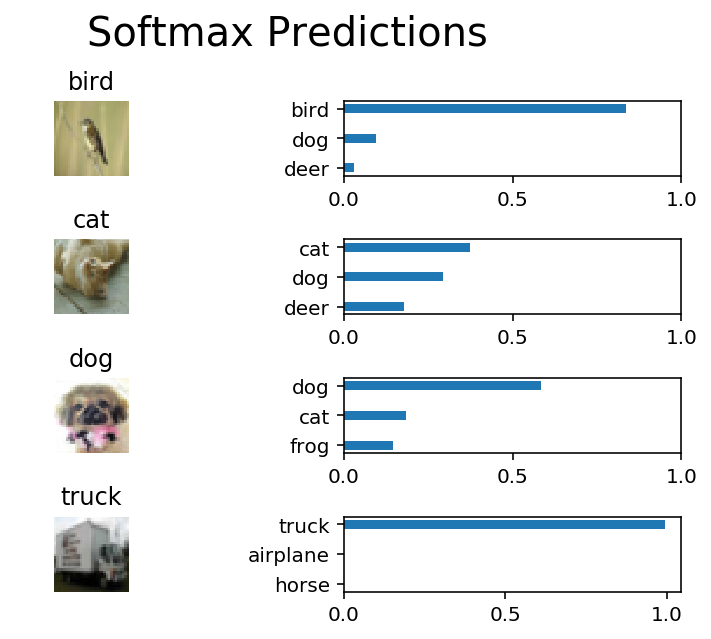

In [42]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
import pickle
import helper
import random

# Set batch size if not already set
try:
    if batch_size:
        pass
except NameError:
    batch_size = 64

save_model_path = './image_classification'
n_samples = 4
top_n_predictions = 3

def test_model():
    """
    Test the saved model against the test dataset
    """

    test_features, test_labels = pickle.load(open('preprocess_training.p', mode='rb'))
    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
        for train_feature_batch, train_label_batch in helper.batch_features_labels(test_features, test_labels, batch_size):
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: train_feature_batch, loaded_y: train_label_batch, loaded_keep_prob: 1.0})
            test_batch_count += 1

        print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))

        # Print Random Samples
        random_test_features, random_test_labels = tuple(zip(*random.sample(list(zip(test_features, test_labels)), n_samples)))
        random_test_predictions = sess.run(
            tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
            feed_dict={loaded_x: random_test_features, loaded_y: random_test_labels, loaded_keep_prob: 1.0})
        helper.display_image_predictions(random_test_features, random_test_labels, random_test_predictions)


test_model()

## Why 50-80% Accuracy?
You might be wondering why you can't get an accuracy any higher. First things first, 50% isn't bad for a simple CNN.  Pure guessing would get you 10% accuracy. That's because there are many more techniques that can be applied to your model and we recemmond that once you are done with this project, you explore!

## Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook.  Save the notebook file as "image_classification.ipynb" and save it as a HTML file under "File" -> "Download as".  Include the "helper.py" and "problem_unittests.py" files in your submission.

## 为什么仅有 50%~ 80% 的准确率？

你也许会觉得奇怪，为什么你的准确率总是提高不上去。对于简单的 CNN 网络而言，50% 并非是很差的表现。纯粹的猜测只会得到 10% 的准确率（因为一共有 10 类）。这是因为还有许多许多能够应用到你模型的技巧。在你做完了该项目之后，你可以探索探索我们给你推荐的一些方法。


## 提交该项目

在提交项目前，请确保你在运行了所有的 cell 之后保存了项目。将项目储存为 "image_classification.ipynb" 并导出为一个 HTML 文件。你可以再菜单栏中选择 File -> Download as 进行导出。请将 "helper.py" 及  "problem_unittests.py" 文件也放在你的提交文件中。